In [22]:
#!pip install scikit-optimize -q

#import sklearn
import pandas as pd
import matplotlib.pyplot as plt
# import skopt
import plotly
import numpy as np



In [5]:
df = pd.read_csv('/Users/marcellofelipelli/Documents/DataAnalyticsPortfolio/files/dados_inadimplencia.csv')

df.tail()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
14573,11250.000000,1893.15,12.157324,1,2.0,0.501213,0.591424,0.513171,0.117428,545.0,0
14574,33750.000000,4900.05,17.000000,0,3.0,0.501213,0.563311,0.513171,0.016500,502.0,1
14575,38070.000000,2878.65,12.157324,0,3.0,0.501213,0.748159,0.513171,0.070100,699.0,0
14576,16855.246324,5154.30,7.000000,0,2.0,0.501213,0.559936,0.513171,0.030600,1323.0,0
14577,13500.000000,900.00,12.157324,0,2.0,0.235389,0.342254,0.513171,0.117428,484.0,0


In [6]:
df['inadimplente'].value_counts(normalize=True)

inadimplente
0    0.676499
1    0.323501
Name: proportion, dtype: float64

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      14578 non-null  float64
 1   anuidade_emprestimo  14578 non-null  float64
 2   anos_casa_propria    14578 non-null  float64
 3   telefone_trab        14578 non-null  int64  
 4   avaliacao_cidade     14578 non-null  float64
 5   score_1              14578 non-null  float64
 6   score_2              14578 non-null  float64
 7   score_3              14578 non-null  float64
 8   score_social         14578 non-null  float64
 9   troca_telefone       14578 non-null  float64
 10  inadimplente         14578 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.2 MB


In [8]:
round(df['inadimplente'].value_counts(normalize=True)*100, 2)

inadimplente
0    67.65
1    32.35
Name: proportion, dtype: float64

In [9]:
x = df.drop('inadimplente', axis =1)
y = df['inadimplente']

In [10]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.33, random_state=RANDOM_STATE, stratify=y)

In [11]:
df.nunique()

receita_cliente          292
anuidade_emprestimo     4235
anos_casa_propria         49
telefone_trab              2
avaliacao_cidade           4
score_1                 6483
score_2                12466
score_3                  505
score_social             842
troca_telefone          2843
inadimplente               2
dtype: int64

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
receita_cliente,14578.0,17199.725994,9474.981330,2700.000000,11407.500000,16855.246324,20250.000000,450000.000000
anuidade_emprestimo,14578.0,2760.161782,1267.513387,332.100000,2029.950000,2722.188351,3161.700000,22500.000000
anos_casa_propria,14578.0,12.377257,7.713730,0.000000,12.157324,12.157324,12.157324,69.000000
telefone_trab,14578.0,0.267115,0.442468,0.000000,0.000000,0.000000,1.000000,1.000000
avaliacao_cidade,14578.0,2.046987,0.499302,1.000000,2.000000,2.000000,2.000000,3.000000
score_1,14578.0,0.478113,0.143608,0.017177,0.466333,0.501213,0.501213,0.931287
score_2,14578.0,0.488559,0.197435,0.000005,0.355837,0.526625,0.644467,0.820487
score_3,14578.0,0.509510,0.067365,0.000527,0.513171,0.513171,0.513171,0.866731
score_social,14578.0,0.116576,0.074966,0.000000,0.092800,0.117428,0.117428,1.000000
troca_telefone,14578.0,925.136661,797.499951,0.000000,275.000000,740.000000,1502.000000,4128.000000


In [13]:
from sklearn.tree import DecisionTreeClassifier

modelo_dt = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE)
modelo_dt.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
from sklearn.metrics import recall_score

recall_dt = recall_score(y_teste, modelo_dt.predict(x_teste))
print(f"Recall do DT = {recall_dt:.3f}")

Recall do DT = 0.143


# Regressão Logistica

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [16]:
logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [17]:
logistic_pipeline.fit(x_treino, y_treino)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [18]:
recall_lr = recall_score(y_teste, logistic_pipeline.predict(x_teste))
print(f"Recall do logistic regression = {recall_lr:.3f}")

Recall do logistic regression = 0.253


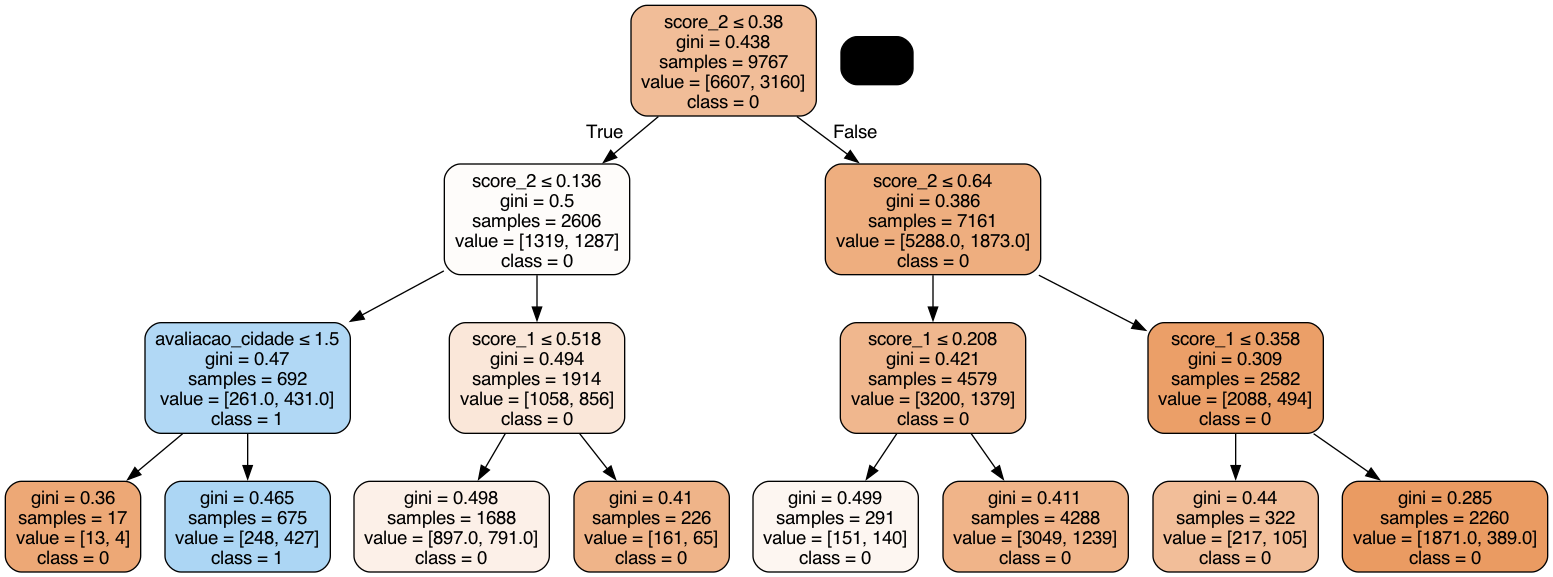

In [20]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth =3, random_state=42)
modelo.fit(x_treino, y_treino)

feature_cols = x_treino.columns
dot_data = StringIO()

export_graphviz(modelo, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols, class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

logistic_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
logistic_pipeline.fit(x_treino, y_treino)

nome_colunas = list(x_treino.columns)
coef_model = logistic_pipeline.named_steps['logisticregression'].coef_[0]
coef_df = pd.DataFrame({"Coluna": nome_colunas, "coeficientes": coef_model})
coef_df.sort_values(by="coeficientes", ascending=False)

,Coluna,coeficientes
4,avaliacao_cidade,0.093488
2,anos_casa_propria,0.078257
1,anuidade_emprestimo,0.036625
0,receita_cliente,-0.012309
3,telefone_trab,-0.031449
8,score_social,-0.074919
9,troca_telefone,-0.097151
7,score_3,-0.149227
5,score_1,-0.250049
6,score_2,-0.464961


In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
import numpy as np

param_grid_dt = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': np.linspace(6, 12, 4, dtype=int),
    'min_samples_split': np.linspace(5, 20, 4, dtype=int),
    'min_samples_leaf': np.linspace(5, 20, 4, dtype=int),
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

In [31]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

dt_grid_search = GridSearchCV(estimator = DecisionTreeClassifier(random_state=RANDOM_STATE),
                              param_grid = param_grid_dt,
                              scoring = "recall",
                              n_jobs = -1,
                              cv = cv)

dt_grid_search.fit(x_treino, y_treino)

/opt/homebrew/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

In [32]:
dt_grid_search.best_estimator_

DecisionTreeClassifier(max_depth=np.int64(12), max_features='sqrt',
                       min_samples_leaf=np.int64(15),
                       min_samples_split=np.int64(5), random_state=42)